# Data Science Mathematics
# Principal Component Analysis
# In-Class Activity

Refer to your in-class handout for instructions.  You are going to do most of the coding yourself here.

Read about this library here:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

First, let's import our relevant libraries.

In [44]:
import numpy as np
from sklearn.decomposition import PCA

First, we need to instantiate our data set.

In [45]:
data = np.array([[5.1,3.5,1.4,0.2],
[4.9,3.0,1.4,0.2],
[4.7,3.2,1.3,0.2],
[4.6,3.1,1.5,0.2],
[5.0,3.6,1.4,0.2],
[5.4,3.9,1.7,0.4],
[4.6,3.4,1.4,0.3],
[5.0,3.4,1.5,0.2],
[4.4,2.9,1.4,0.2],
[4.9,3.1,1.5,0.1],
[5.4,3.7,1.5,0.2],
[4.8,3.4,1.6,0.2],
[4.8,3.0,1.4,0.1],
[4.3,3.0,1.1,0.1],
[5.8,4.0,1.2,0.2],
[5.7,4.4,1.5,0.4],
[5.4,3.9,1.3,0.4],
[5.1,3.5,1.4,0.3],
[5.7,3.8,1.7,0.3],
[5.1,3.8,1.5,0.3]])

Now, in the cell below, calculate your covariance matrix for the above data set:
> c = np.cov(x)

In [46]:
c = np.cov(data)

Print the covariance matrix.

In [47]:
c

array([[4.75      , 4.42166667, 4.35333333, 4.16      , 4.69666667,
        4.86      , 4.215     , 4.595     , 3.965     , 4.49333333,
        5.03      , 4.38666667, 4.415     , 4.105     , 5.58      ,
        5.35      , 5.01333333, 4.67166667, 5.16166667, 4.72833333],
       [4.42166667, 4.14916667, 4.055     , 3.885     , 4.35833333,
        4.515     , 3.9075    , 4.28416667, 3.7075    , 4.21      ,
        4.68333333, 4.08333333, 4.1375    , 3.81416667, 5.18      ,
        4.93666667, 4.645     , 4.34916667, 4.81916667, 4.37916667],
       [4.35333333, 4.055     , 3.99      , 3.81333333, 4.30333333,
        4.45333333, 3.86166667, 4.21166667, 3.635     , 4.12      ,
        4.61      , 4.02      , 4.04833333, 3.76166667, 5.11333333,
        4.9       , 4.59333333, 4.28166667, 4.73166667, 4.33166667],
       [4.16      , 3.885     , 3.81333333, 3.65666667, 4.11      ,
        4.25666667, 3.68833333, 4.03166667, 3.485     , 3.95333333,
        4.40666667, 3.85333333, 3.88166667, 3

Now, in the cell below, calculate the eigenvectors and eigenvalues of the covariance matrix.

In [48]:
eigen_vals, eigen_vectors = np.linalg.eig(c)

Now calculate the principal components (reduce to 2 dimensions).  First, you need to instantiate your PCA object.

In [49]:
pca = PCA(n_components=2)

Now, in the cell below, train your model on your dataset:
> pca.fit(X)

In [50]:
pca.fit(data)

PCA(n_components=2)

The following commands can be used to get your explained variance ratios (percentage of variance explained by each of the selected components) and your dimensionally-reduced components.

Print these values in the cells below.

In [51]:
print(pca.explained_variance_ratio_)

[0.87954353 0.06300167]


In [52]:
print(pca.components_)

[[ 0.71816179  0.68211748  0.08126075  0.1111579 ]
 [ 0.61745716 -0.65996887  0.37215116 -0.21140307]]


c)	Project the dataset into the appropriate principle component space.

In [53]:
# to project the dataset into the appropriate component space,
# as far as I understand, we use the transform function
# (provided we've already called the "fix" function)
data_new = pca.transform(data)

d)	Assuming the class of each record is known, explain how this reduced data set could be used to derive a supervised learning algorithm based on clustering.

In [54]:
# as I understand it, this new data set is projected onto the principle component space, which 
# allows us to think of it as varying in fewer dimensions, but in a way that is the most meaningful
# dimensions.  We can then apply clustering or other algorithms which are efficient, timely, and 
# informative in 2d space - and by implication, we can ignore the dimensions that are not useful 

Bonus: Figure out how to plot your principal components as a scatter plot:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

In [55]:
# first import the plot lib
import matplotlib.pyplot as plt

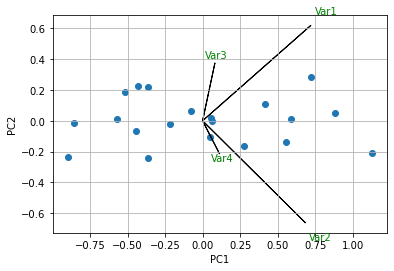

In [56]:
#not sure I did this right but sample code from stackexchange made something that kindof looks cool

def myplot(score,coeff):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1])
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
myplot(data_new[:,0:2], np.transpose(pca.components_[0:2,:])) 
plt.show()

***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.